In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.API import update_Cal_IPC
from ATS.general import *
from ATS.QAQC import *

pd.options.display.max_columns = 500

2021-12-22 01:06:22.438604: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 01:06:22.438646: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load, Merge, and Subset Data

<Item title:"SAC_Annual_NNIP_Inspection_RT" type:Feature Layer Collection owner:Anooshi>
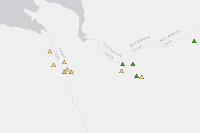

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('5fbc88c2ea78475d9285b35322152385')

stations = output['data0']
observations = output['table0']
feature_service = output['feature_service']

In [3]:
# Merge related table and feature layer
data = stations.merge(observations, left_on='GlobalID', right_on='Ref_to_Stations', how='inner')
data = data.drop(columns=['GlobalID_x','Ref_to_Stations'])
data = data.rename(columns={'OBJECTID_x':'Point_ID','GlobalID_y':'Record_GlobalID', 'OBJECTID_y':'Record_ID'})
data

,Point_ID,BHR_Site,Comp_Typ,Habitat,Zone,FieldSeason,SHAPE,Record_ID,Surveyor_1,Surveyor_2,Observation_Date,Species_Sci,Phenology,Cover,Pop_Size,Int_Dist,Comments,Record_GlobalID,Field_Season
0,1,SAC,Rehabilitated,Oak Woodland,6N,Early Season,"{'x': 6190520.953044134, 'y': 2037631.12584206...",1,Joy Stewart,Marina Olson,2018-06-05 00:14:47,Conium maculatum,juvenile,1-25,1,Homogeneous,Larger patches nearby.,0bd5c648-37d4-47f1-b61e-15185b3d095e,Early Season
1,1,SAC,Rehabilitated,Oak Woodland,6N,Early Season,"{'x': 6190520.953044134, 'y': 2037631.12584206...",19,Janel Mayo,Richard Graham-Bruno,2019-06-26 03:05:36,Conium maculatum,None,0,0,None,"Larger patches nearby. No COMA in quad, area r...",fa0ca5e2-b41a-4edd-9759-b8960cbd2be9,Early Season
2,1,SAC,Rehabilitated,Oak Woodland,6N,Early Season,"{'x': 6190520.953044134, 'y': 2037631.12584206...",29,Kevin Sherrill,Darian Wong,2020-06-17 16:17:12,Conium maculatum,None,0,0,None,No COMA plants present. Thatch from non-native...,0112d371-c827-4af3-bbf5-ba82b686443a,Early Season
3,1,SAC,Rehabilitated,Oak Woodland,6N,Early Season,"{'x': 6190520.953044134, 'y': 2037631.12584206...",43,Kevin Sherrill,Roger Stephens,2021-06-30 17:08:00,Conium maculatum,None,0,0,None,No COMA plants present. Thatch from non-native...,25f7347f-eaf4-40dc-9442-3f38553dc400,Early Season
4,2,SAC,Rehabilitated,Sycamore Riparian,5,Early Season,"{'x': 6188248.390988213, 'y': 2038139.87285606...",2,Joy Stewart,Marina Olson,2018-06-05 00:57:56,Rubus armeniacus,adult/no buds,1-25,1,Homogeneous,Nail was placed directly in center of plot; se...,4cfdbadd-8435-4cb1-b454-ba7214a412f9,Early Season
5,2,SAC,Rehabilitated,Sycamore Riparian,5,Early Season,"{'x': 6188248.390988213, 'y': 2038139.87285606...",18,Janel Mayo,Richard Graham-Bruno,2019-06-26 02:41:47,Rubus armeniacus,None,0,0,None,Nail was placed directly in center of plot; se...,8ce0df32-198b-49a3-9946-19fa0d9b28e0,Early Season
6,2,SAC,Rehabilitated,Sycamore Riparian,5,Early Season,"{'x': 6188248.390988213, 'y': 2038139.87285606...",30,Kevin Sherrill,Darian Wong,2020-06-17 16:59:15,Rubus armeniacus,None,0,0,None,No RUAR present. Quadrat has one nail for the ...,7d33c603-a7f3-4f0f-9cfb-fc99b0370f38,Early Season
7,2,SAC,Rehabilitated,Sycamore Riparian,5,Early Season,"{'x': 6188248.390988213, 'y': 2038139.87285606...",44,Kevin Sherrill,Roger Stephens,2021-06-30 17:35:49,Rubus armeniacus,None,0,0,None,No RUAR present. Quadrat has one nail for the ...,9e68a83b-5e40-45ea-b5bc-00b597900dbd,Early Season
8,3,SAC,Established/Reestablished,Oak Savannah,5,Early Season,"{'x': 6186848.550612046, 'y': 2037676.97286322...",3,Joy Stewart,Marina Olson,2018-06-05 01:21:24,Elymus caput-medusae,None,0,0,None,Patch was recently mowed; patch chosen to trac...,5aab7066-c563-44ea-857b-6154bf2e27b7,Early Season
9,3,SAC,Established/Reestablished,Oak Savannah,5,Early Season,"{'x': 6186848.550612046, 'y': 2037676.97286322...",20,Janel Mayo,Richard Graham-Bruno,2019-06-26 03:32:21,Elymus caput-medusae,seed set,1-25,5,Homogeneous,Patch was recently mowed; patch chosen to trac...,fb9b1cd3-d2ce-4086-9909-32cd8379d7cc,Early Season


In [4]:
# Subset by year

sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 

KeyboardInterrupt: Interrupted by user

# QAQC

In [0]:
data.columns

In [0]:
# QAQC Find blank entries
find_blank_entries(data, exclude_cols=['Int_Dist','Phenology','Surveyor_2'])

In [0]:
QAQC_plot(data,['BHR_Site', 'Comp_Typ', 'FieldSeason', 'Habitat',  'Zone',
       'Cover', 'Field_Season', 'Int_Dist', 
       'Observation_Date', 'Phenology', 'Pop_Size', 'Species_Sci', 'Surveyor_1',
       'Surveyor_2'])

In [0]:
compare_years_catagorical(data, ['BHR_Site', 'Comp_Typ', 'FieldSeason', 'Habitat',  'Zone',
       'Cover', 'Field_Season',  'Int_Dist', 
        'Phenology', 'Pop_Size', 'Species_Sci', 'Surveyor_1',
       'Surveyor_2'], '2018','2019')

In [0]:
# Early Season Comparison between Monitoring Years
subES = data.loc[data.FieldSeason=='Early Season',:]
compare_years_catagorical(subES,['Pop_Size', 'Cover'], '2018', '2019')

In [0]:
# Late Season Comparison between Monitoring Years
subLS = data.loc[data.FieldSeason=='Late Season',:]
compare_years_catagorical(subLS,['Pop_Size', 'Cover'], '2018', '2019')

In [0]:
compare_surveyors(subES, 'Pop_Size', 'Surveyor_1', 5)

In [0]:
compare_surveyors(subLS, 'Pop_Size', 'Surveyor_1', 5)

# Export data deliverable

In [25]:
data.columns

Index(['Point_ID', 'BHR_Site', 'Comp_Typ', 'Habitat', 'Zone', 'FieldSeason',
       'SHAPE', 'Record_ID', 'Surveyor_1', 'Surveyor_2', 'Observation_Date',
       'Species_Sci', 'Phenology', 'Cover', 'Pop_Size', 'Int_Dist', 'Comments',
       'Record_GlobalID', 'Field_Season'],
      dtype='object')

In [29]:
field_order = ['BHR_Site',
'Observation_Date',
'Surveyor_1',
'Surveyor_2',
'Comp_Typ',
'Zone',
'Habitat',
'Field_Season',
'FieldSeason',
'Species_Sci',
'Phenology',
'Cover',
'Pop_Size',
'Int_Dist',
'Comments',
'Point_ID',
'Record_ID',
'Record_GlobalID',
'SHAPE',]

In [30]:
export_data_deliverable(data, feature_service, field_order,layer_num=0, file_name='SAC_NNIP_Annual_Inspection')

Exported to Outputs/SAC_NNIP_Annual_Inspection_Data_20211025.xlsx


TypeError: QAQC_attachment_filenames() missing 1 required positional argument: 'feature_service'